In [1]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X=[]
Y1=[]
for i in range(100):
  X.append(i)
  Y1.append(i+5)

In [0]:
Y2=[]
for i in range(100):
  Y2.append(i*i)

In [0]:

inppt = np.column_stack((Y1, Y2))
tstt = [Y1*Y2 for Y1,Y2 in zip(Y1,Y2)]

In [0]:
inppt = np.array(inppt, dtype="float32")
trgt = np.array(tstt, dtype="float32")

In [49]:
inppt= np.array(inppt).reshape(100, 2,1)
inppt.shape

(100, 2, 1)

In [39]:
trgt.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(inppt,trgt,test_size=0.2,random_state=4)

In [51]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 2, 200)            161600    
_________________________________________________________________
lstm_14 (LSTM)               (None, 2, 100)            120400    
_________________________________________________________________
lstm_15 (LSTM)               (None, 2, 50)             30200     
_________________________________________________________________
lstm_16 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [52]:
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 5s 65ms/step - loss: 1175143049068544.0000 - val_loss: 1225684882030592.0000
Epoch 2/1000
80/80 [==============================] - 0s 1ms/step - loss: 1175131560031027.2500 - val_loss: 1225661125492736.0000
Epoch 3/1000
80/80 [==============================] - 0s 983us/step - loss: 1175103723274240.0000 - val_loss: 1225641663922176.0000
Epoch 4/1000
80/80 [==============================] - 0s 1ms/step - loss: 1175129103846604.7500 - val_loss: 1225597640507392.0000
Epoch 5/1000
80/80 [==============================] - 0s 1ms/step - loss: 1175015971723673.7500 - val_loss: 1225417788751872.0000
Epoch 6/1000
80/80 [==============================] - 0s 1ms/step - loss: 1174881029219942.2500 - val_loss: 1225020370059264.0000
Epoch 7/1000
80/80 [==============================] - 0s 1ms/step - loss: 1174644477185228.7500 - val_loss: 1225198745419776.0000
Epoch 8/1000
80/80 [=======================

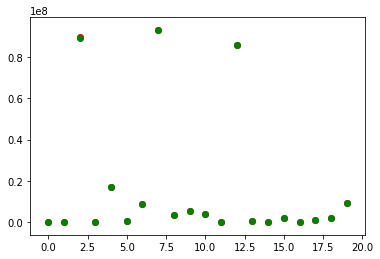

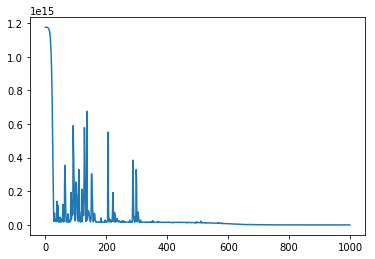

In [53]:
results = model.predict(x_test)
results.shape
y_test.shape
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()
plt.plot(history.history['loss'])
plt.show()